
# Imports

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from colorama import Fore, Back, Style # Nice Colors
import customUtils as ut
import customUtils39 as ut2
import os
import mightyDecoder2 as decoder


# Pipeline

In [8]:
images = []

fixedImages = [(_,_,_)] * 16

import os
# Path to the folder containing images
image_folder = "TC"
# Loop through all files in the folder
for filename in os.listdir(image_folder):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")): 
        image_path = os.path.join(image_folder, filename)
        normal_img = cv2.imread(image_path)
        __, thresholded_img = cv2.threshold(normal_img, 88, 255, cv2.THRESH_BINARY)
        image_tuple = (normal_img, thresholded_img, normal_img)  # Include normal image twice
        images.append(image_tuple)


kernel = np.ones((3,3), np.uint8)  # For Any Dilation \ Erosion Operations


for idx,img in enumerate(images):
    # Loop over the images, Check for issues, If issue exists --> Fix it using the suitable function
    img = img
    img = list(img)
    img[2] = cv2.cvtColor(img[2],cv2.COLOR_BGR2GRAY)
    cnts = ut2.findContours(img[2])
    

    if (ut2.filterContours(cnts) == (True,0)  or (idx == 4) ): # Image doesn't need fixing, TC5 Doesnt need fixing
        # Do Nothing
        print(Fore.GREEN,'Test Case ',idx+1,'doesn\'t need fixing')
    
    # Indivdual Solutions Corner #

    if (idx == 14):
        
        print(Fore.CYAN,'TC 15 has an individual solution')
        fixedImages[idx] = cv2.threshold(img[2], 88, 255, cv2.THRESH_BINARY)
        print(Fore.GREEN,'TC 15 Fixed')

    # Indivdual Solutions Corner #

    
    elif(ut2.filterContours(cnts) == (False,1)): # Image needs to be rotated
        while(ut2.filterContours(cnts) == (False,1)):
            # Try Flipping The Image
            print(Fore.RED,'Test Case ',idx+1,' has all the locator boxes, But they are misalligned  ' + Fore.YELLOW,'Flipping...')
            __,__,totalcnts = ut2.filterContoursV2(cnts)
            flipped =  ut.fixFlippedFixedQr(img[2],totalcnts)
            cnts = ut2.findContours(flipped)
            img[2] = flipped
        print(Fore.GREEN,'Test Case ',idx+1,' Rotation Fixed')
    if(ut2.detect_histogram_equalization(img[2]) == True):
        print(Fore.RED,'Test Case ',idx+1, ' Has Noise.')
        img[2] = ut2.fixHistogramEqualization(img[2],kernel)
        print(Fore.GREEN,'Test Case ',idx+1,' Fixed')
    if(ut2.isAlmostInvisibleDark(img[2])):
        print(Fore.YELLOW,'Test Case ',idx+1, ' Is too dark')
        img[2] = ut2.invertImg(img[2])
        print(Fore.GREEN,'Test Case' ,idx+1,' Fixed')
        cnts = ut2.findContours(img[2])
    elif(ut2.isAlmostInvisible(img[2]) and idx != 3):
        print(Fore.RED,'Test Case ', idx+1, ' needs to be Thresholded with the mean value and Have the locators re-drawn')
        img[2] = ut2.threshHoldMean(img[2])
        img[2] = ut2.drawLocatorBoxes(img[2])
        img[2] = cv2.dilate(img[2],kernel,iterations=1)
        print(Fore.GREEN,'Test Case' ,idx+1,' Fixed')
    if (ut2.isSkewed(img[2])[0] == True):
        __,angle = ut2.isSkewed(img[2])
        print(Fore.RED,'Test Case ',idx+1, ' Needs to be unskewed')
        img[2] = ut2.fixSkew(img[2],angle)
        print(Fore.GREEN,'Test Case ',idx+1, ' Fixed')
    if(ut2.detectPeriodicNoise(img[2]) == True):
        print(Fore.RED,'Test Case ',idx+1, ' Has Periodic Noise.')
        img[2] = ut2.fixPeriodicNoise(img[2])
        print(Fore.GREEN,'Test Case ',idx+1, ' Fixed')  
    if(ut2.detect_salt_and_pepper_noise(img[2])):
        print(Fore.RED,'Test Case ',idx+1, ' Has Salt & Pepper Noise.')
        img[2] = ut2.fixSaltAndPepper(img[2])
        print(Fore.GREEN,'Test Case ',idx+1, ' Fixed') 
    if(ut2.needs_preprocessing(img[2])):
        print(Fore.RED,'Test Case ',idx+1, ' Detected')
        img[2] = ut2.process_image(img[2])
        fixedImages[idx] = img[2]

    
    
    


    if(img[2].min() > 88):
        ret,thresh1 = cv2.threshold(img[2],img[2].mean(),255,cv2.THRESH_BINARY)
    else:   
        ret,thresh1 = cv2.threshold(img[2],88,255,cv2.THRESH_BINARY)


    fixedImages[idx] = thresh1

    if(idx == 1):
        print(Fore.RED,'Couldn\'t Decode   ' + str(idx+1))
    else:
        if (decoder.decodeQrCode(fixedImages[idx])):
            print('\n')
        else:
            print('Couldn\'t Decode ' + str(idx+1))


        

   



 Test Case  1 doesn't need fixing
This codec can correct up to 3 errors and 7 erasures independently
01-Good job!


 Test Case  2  Needs to be unskewed
 Test Case  2  Fixed
 Couldn't Decode   2
 Test Case  3  has all the locator boxes, But they are misalligned   Flipping...
 Test Case  3  Rotation Fixed
This codec can correct up to 3 errors and 7 erasures independently
LeffyBinaYaDonya


 Test Case  4  has all the locator boxes, But they are misalligned   Flipping...
 Test Case  4  Rotation Fixed
 Test Case  4  Is too dark
 Test Case 4  Fixed
This codec can correct up to 3 errors and 7 erasures independently
Black mirror hehe


 Test Case  5 doesn't need fixing
This codec can correct up to 3 errors and 7 erasures independently
|rxwx1eh2


 Test Case  6  Detected
This codec can correct up to 3 errors and 7 erasures independently
dwXQ49gcwWQ


This codec can correct up to 3 errors and 7 erasures independently
THE MIGHTY FINGER


 Test Case  8  needs to be Thresholded with the mean value 

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'cv::binary_op'



# Printing out the Results

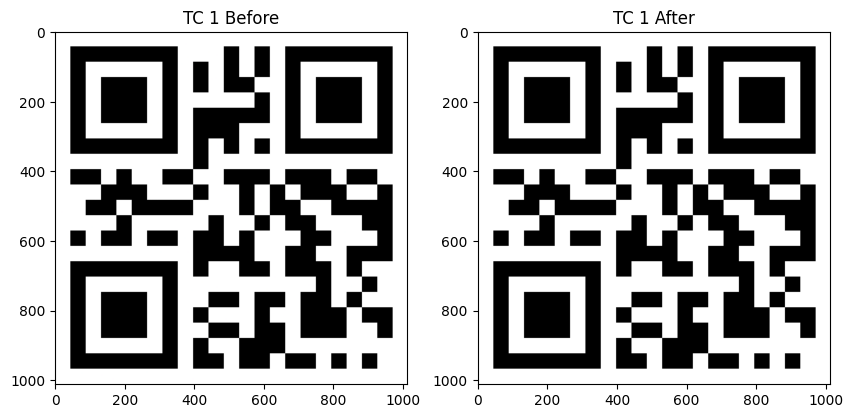

In [ ]:
# TC 1

fig = plt.figure(figsize=(10, 5))



#Before
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(images[0][0],cmap='gray')
ax1.set_title('TC 1 Before')

#After
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(fixedImages[0],cmap='gray')
ax2.set_title('TC 1 After')


plt.show()

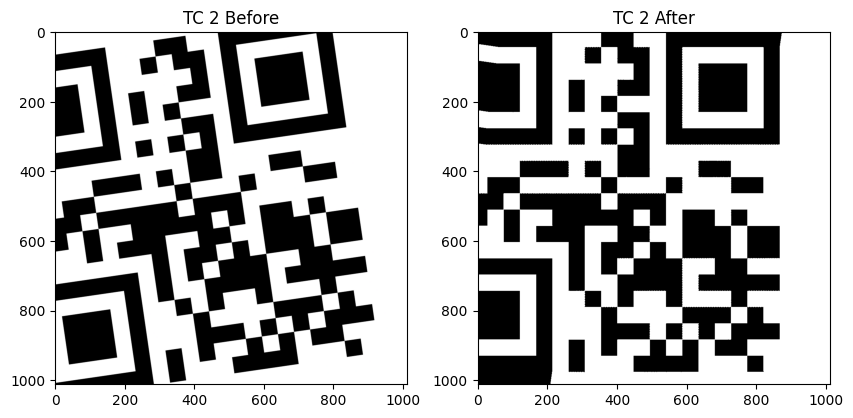

In [ ]:
# TC 2

fig = plt.figure(figsize=(10, 5))



#Before
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(images[1][0],cmap='gray')
ax1.set_title('TC 2 Before')

#After
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(fixedImages[1],cmap='gray')
ax2.set_title('TC 2 After')


plt.show()

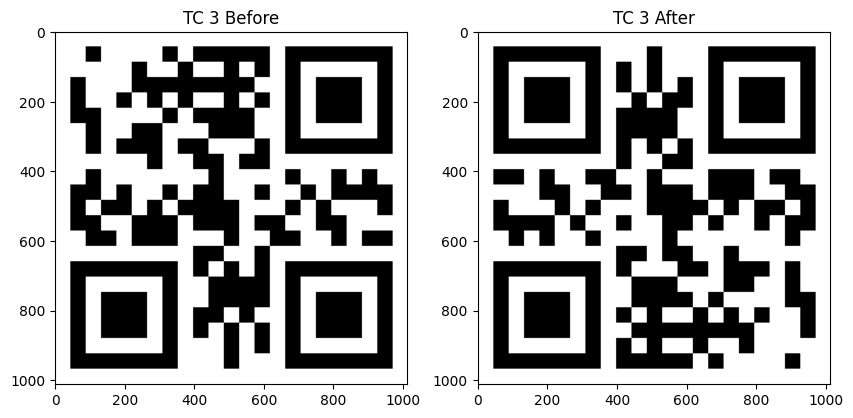

In [ ]:
# TC 3

fig = plt.figure(figsize=(10, 5))



#Before
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(images[2][0],cmap='gray')
ax1.set_title('TC 3 Before')

#After
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(fixedImages[2],cmap='gray')
ax2.set_title('TC 3 After')


plt.show()

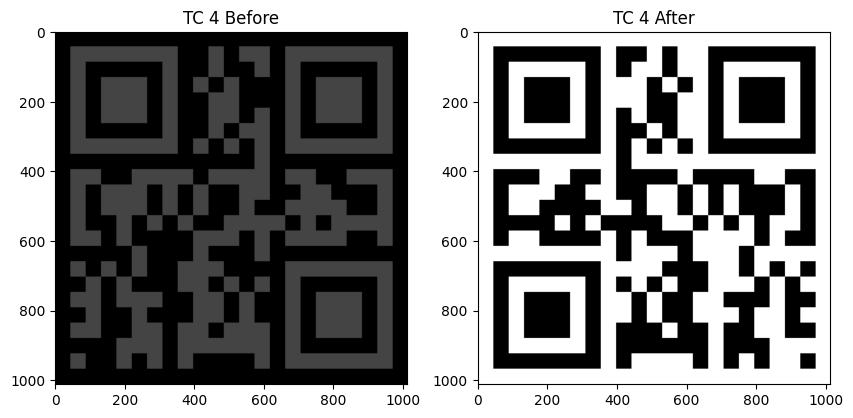

In [ ]:
# TC 4

fig = plt.figure(figsize=(10, 5))



#Before
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(images[3][0],cmap='gray')
ax1.set_title('TC 4 Before')

#After
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(fixedImages[3],cmap='gray')
ax2.set_title('TC 4 After')


plt.show()

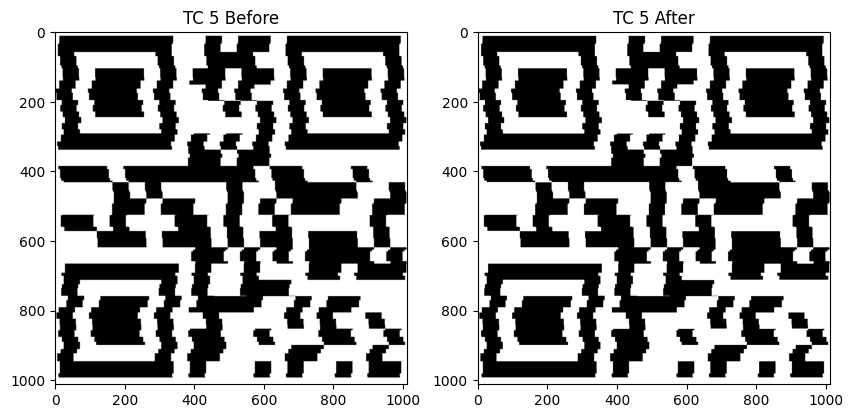

In [ ]:
# TC 2

fig = plt.figure(figsize=(10, 5))



#Before
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(images[4][0],cmap='gray')
ax1.set_title('TC 5 Before')

#After
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(fixedImages[4],cmap='gray')
ax2.set_title('TC 5 After')


plt.show()

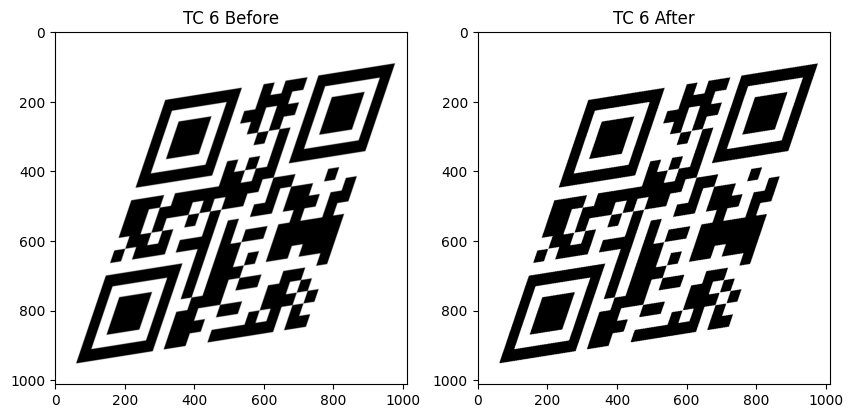

In [ ]:
# TC 2

fig = plt.figure(figsize=(10, 5))



#Before
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(images[5][0],cmap='gray')
ax1.set_title('TC 6 Before')

#After
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(fixedImages[5],cmap='gray')
ax2.set_title('TC 6 After')


plt.show()

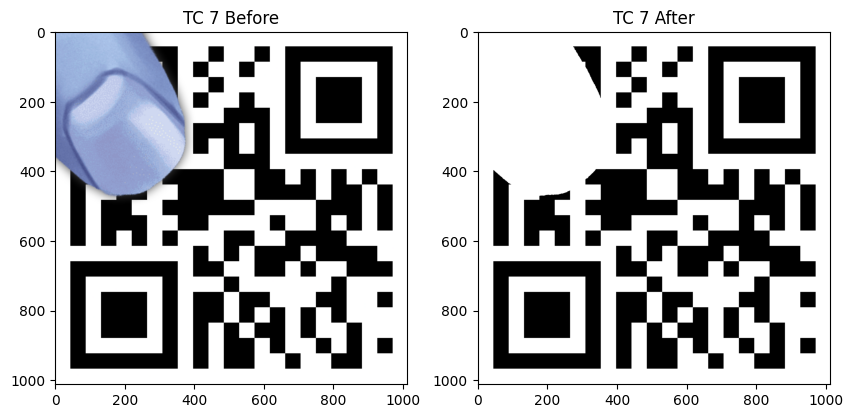

In [ ]:
# TC 2

fig = plt.figure(figsize=(10, 5))



#Before
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(images[6][0],cmap='gray')
ax1.set_title('TC 7 Before')

#After
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(fixedImages[6],cmap='gray')
ax2.set_title('TC 7 After')


plt.show()

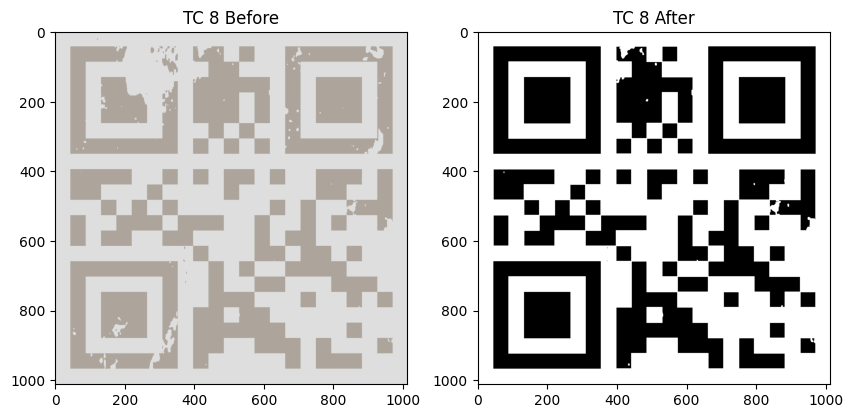

In [ ]:
# TC 2

fig = plt.figure(figsize=(10, 5))



#Before
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(images[7][0],cmap='gray')
ax1.set_title('TC 8 Before')

#After
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(fixedImages[7],cmap='gray')
ax2.set_title('TC 8 After')


plt.show()

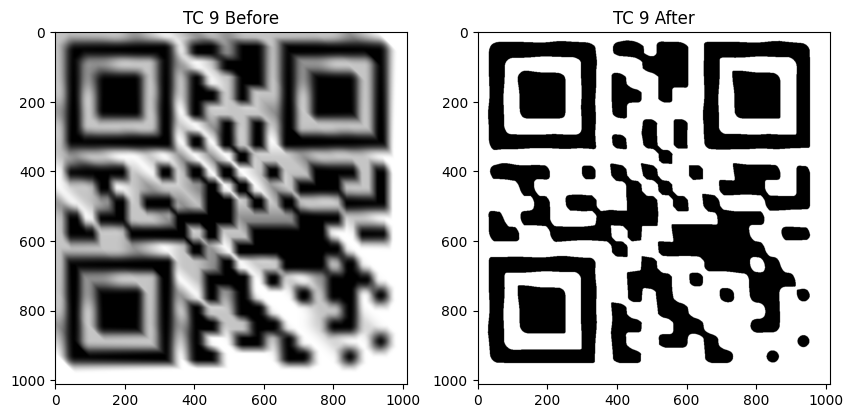

In [ ]:
# TC 2

fig = plt.figure(figsize=(10, 5))



#Before
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(images[8][0],cmap='gray')
ax1.set_title('TC 9 Before')

#After
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(fixedImages[8],cmap='gray')
ax2.set_title('TC 9 After')


plt.show()

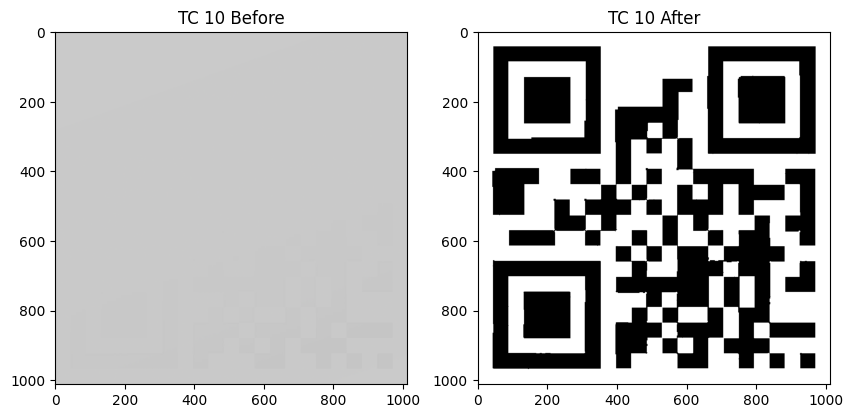

In [ ]:
# TC 2

fig = plt.figure(figsize=(10, 5))



#Before
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(images[9][0],cmap='gray')
ax1.set_title('TC 10 Before')

#After
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(fixedImages[9],cmap='gray')
ax2.set_title('TC 10 After')


plt.show()

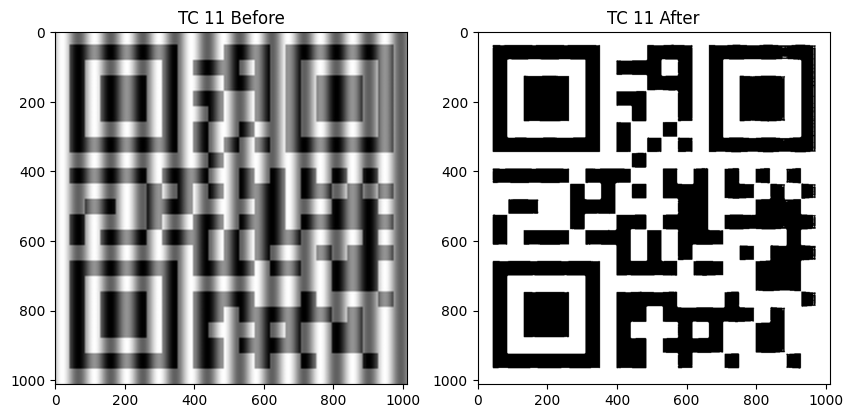

In [ ]:
# TC 2

fig = plt.figure(figsize=(10, 5))



#Before
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(images[10][0],cmap='gray')
ax1.set_title('TC 11 Before')

#After
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(fixedImages[10],cmap='gray')
ax2.set_title('TC 11 After')


plt.show()

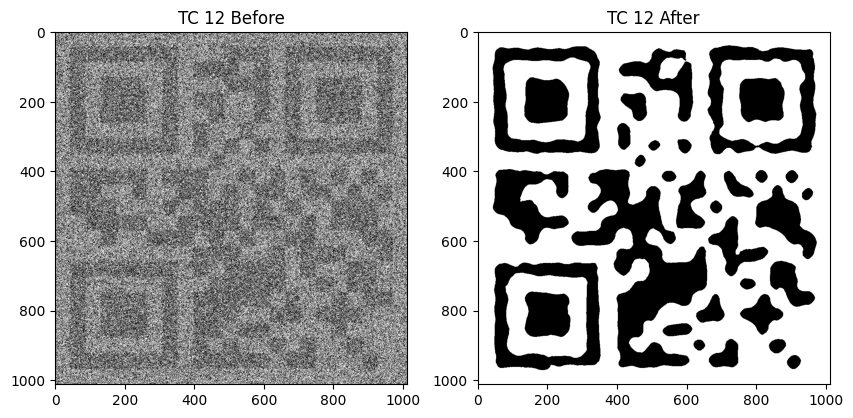

In [ ]:
# TC 2

fig = plt.figure(figsize=(10, 5))



#Before
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(images[11][0],cmap='gray')
ax1.set_title('TC 12 Before')

#After
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(fixedImages[11],cmap='gray')
ax2.set_title('TC 12 After')


plt.show()

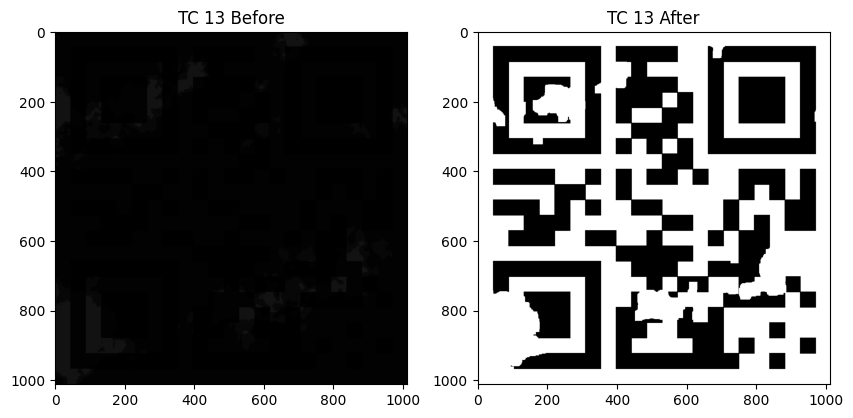

In [ ]:
# TC 2

fig = plt.figure(figsize=(10, 5))



#Before
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(images[12][0],cmap='gray')
ax1.set_title('TC 13 Before')

#After
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(fixedImages[12],cmap='gray')
ax2.set_title('TC 13 After')


plt.show()

AttributeError: 'int' object has no attribute 'ravel'

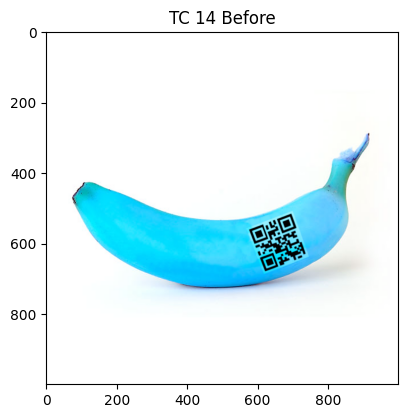

In [ ]:
# TC 2

fig = plt.figure(figsize=(10, 5))



#Before
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(images[13][0],cmap='gray')
ax1.set_title('TC 14 Before')


TC14 = cv2.imread('TC/14.png')
TC14 = cv2.cvtColor(TC14,cv2.COLOR_BGR2GRAY)
TC14 = ut2.threshHoldMean(TC14)
fixedImages[13] = ut2.AdjustPrespective(TC14)
#After
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(fixedImages[13],cmap='gray')
ax2.set_title('TC 14 After')


plt.show()

TypeError: Image data of dtype <U1 cannot be converted to float

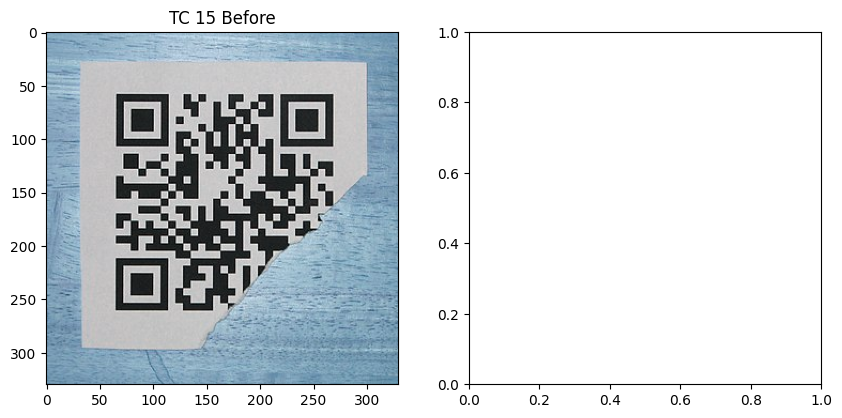

In [ ]:
# TC 5

fig = plt.figure(figsize=(10, 5))



#Before
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(images[14][0],cmap='gray')
ax1.set_title('TC 15 Before')

#After
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(fixedImages[14],cmap='gray')
ax2.set_title('TC 15 After')


plt.show()